# Pontifícia Universidade Católica  PUC-Rio
# Sprint: Análise de Dados e Boas Práticas
### Aluno: Leonardo Braga De Vincenzi
#### MVP Sprint 1 (Dez/2023)

## 1. Definição do Problema

**Qual o objetivo desse MVP?**

O desafio desse projeto acadêmico é, em poucas palavras, buscar o aumento das vendas e da lucratividade de uma empresa comercial varejista.

**Como fazer isso?**

Por meio de uma base de dados inicial de vendas, e pela sua análise, obteremos insights e informações que possam ser relevantes e necessárias para melhorar a tomada de decisão gerencial.

Inicialmente buscaremos conhecer melhor o perfil do nosso cliente, suas preferências, entender melhor porque um estado vende mais que o outro, sua sazonalidade e quais são os produtos mais vendidos.

A idéia é buscar o aperfeiçoamento da relação "consumidor x produto".

**Sobre o dataset utilizado**

O dataset usado neste projeto será o **Customer Shopping Trends Dataset**. Ele oferece informações a respeito do comportamento do consumidor e seus padrões de compra. Como seus dados estão rotulados, trata-se de um aprendizado supervisionado.

Este conjunto de dados captura uma gama de atributos do cliente que inclui idade, sexo, histórico de compras, métodos de pagamento, frequência de compras e avaliações de feedback.

Além disso, possui dados sobre os tipos de itens adquiridos, épocas de compras preferidas e interações com ofertas promocionais.

**Sobre o mercado varejista**

Compreender as dinâmicas e tendências do cliente é fundamental para que as empresas entendam melhor o seu nicho de mercado, oferecendo novos produtos, desenvolvendo estratégias de marketing eficazes, e alinhando suas estratégias de vendas com as novas preferências dos consumidores.

Por ser um segmento volátil e ligado a modismos, a análise desses dados pode auxiliar de forma vantajosa empresas ligadas ao comércio varejista na tomada de decisões gerenciais mais rápidas e precisas.

**Restrições do dataset**

Com uma coleção de 3.900 registros, este dataset foi criado com objetivos acadêmicos pelo ChatGPT. Portanto a sua restrição é que se trata de um dataset criado por modelo de inteligência artificial, não representando um caso real.

**Desafios**

O desafio de se trabalhar com um dataset criado por uma máquina é buscar informações relavantes para o problema proposto, mesmo sabendo que seus dados tenham sido criados seguindo uma lógica estatística.

Para mais detalhes sobre este dataset, consulte: https://www.kaggle.com/datasets/iamsouravbanerjee/customer-shopping-trends-dataset

* OBS 1: Alguns valores nulos foram inseridos no dataset para que ocorra o pré-processamento.
* OBS 2: Também houve a tradução dos atributos e alguns valores texto.

**Informações sobre os atributos do dataset:**

01. **Customer ID** - Identificador exclusivo do cliente (chave primária)
(1, ...,3900)
02. **Age** - Idade do Cliente (18, ...,70)
03. **Gender** - Gênero do Cliente (Male, Female)
04. **Item Purchased** - Item comprado pelo cliente (Backpack, Belt, Blouse,Boots, Coat, Dress, Gloves, Handbag, Hat, Hoodie, Jacket, Jeans, Jewelry, Pants,Sandals, Scarf, Shirt, Shoes, Shorts, Skirt, Sneakers, Socks, Sunglasses, Sweater, T-shirt)
05. **Category** - Categoria do bem adquirido (Acessories, Clothing, Outerware, Footwear)
06. **Purchase Amount(USD)** - Valor de compra (20, ...,100)
07. **Location** - Local onde a compra foi realizada (Alabama, Alaska, Arizona, Arkansas, California, Colorado, Connecticut, Delaware, Florida, Georgia, Hawaii, Idaho, Illinois, Indiana, Iowa, Kansas, Kentucky, Louisiana, Maine, Maryland, Massachusetts, Michigan, Minnesota, Mississippi, Missouri, Montana, Nebraska, Nevada New Hampshire, New Jersey, New Mexico, New York, North Carolina, North Dakota, Ohio, Oklahoma, Oregon, Pennsylvania, Rhode Island, South Carolina, South Dakota, Tennessee, Texas, Utah, Vermont, Virginia, Washington, West Virginia, Wisconsin, Wyoming)
08. **Size** - Tamanho do item adquirido (L,M,S,XL)
09. **Color** - Cor do item adquirido (Beige, Black, Blue, Brown, Charcoal, Cyan, Gold, Gray, Green, Indigo, Lavender, Magenta, Maroon, Olive, Orange, Peach, Pink, Purple, Red, Silver, Teal, Turquoise, Violet, White, Yellow)
10. **Season** - Estação na qual a compra foi feita (Fall, Spring, Summer, Winter)
11. **Review Rating** - Nota dada pelo cliente para o item comprado (25, ...,50)
12. **Subscription Status** - Indica se o cliente possui cartão de fidelidade com a loja (Yes, No)
13. **Shipping Type** - Tipo de envio da compra escolhido pelo ciente (2-Day Shipping, Express, Free Shipping, Next Day Air, Standard, Store Pickup)
14. **Discount Applied** - Indica se foi aplicado um desconto durante a compra (Yes, No)
15. **Promo Code Used** - Indica se foi usado um código promocional durante a compra (Yes, No)
16. **Previous Purchases** - Número total de vendas concluídas pelo cliente, excluindo a transação atual (1, ...,50)
17. **Prefered Payment Method** - Método de pagamento escolhido pelo cliente (Bank Transfer, Cash, Credit Card, Debit Card, PayPal, Venmo)
18. **Frequency of Purchase** - Frequência de compras feita pelo cliente
(Annually, Bi-Weekly, Every 3 Mounths, Fortynightly, Mounthly, Quarterly, Weekly)


Importando bibliotecas e definindo padrão de cores do MVP.

In [26]:
# Imports (bibliotecas)
#
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms # para tratamento de missings
from matplotlib import cm
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Definiçao de Cores
#
colors = ["#89CFF0", "#FF69B4", "#FFD700", "#7B68EE", "#FF4500",
          "#9370DB", "#32CD32", "#8A2BE2", "#FF6347", "#20B2AA",
          "#FF69B4", "#00CED1", "#FF7F50", "#7FFF00", "#DA70D6"]

Configurando para não exibir mensagens de aviso.

In [27]:
# Configuração para não exibir os warnings
#
import warnings
warnings.filterwarnings("ignore")

## 2. Carga de Dados

Iremos usar a biblioteca Pandas (*Python Data Analysis Library*) para carregar de um arquivo .csv disponível online.

Aqui teremos a primeira visualização do dataset.

In [28]:
# Carrega arquivo .csv usando Pandas (pd) acessando uma URL

# Informa a URL de importação do dataset
# url_dados = "https://raw.githubusercontent.com/Leo-Vincenzi/PUC-MVV_1/main/shopping_trends2.csv"

# Informa o cabeçalho das colunas
# colunas1 = ['Customer ID','Age','Gender','Item Purchased','Category','Purchase Amount (USD)','Location','Size','Color','Season','Review Rating','Subscription Status','Shipping Type','Discount Applied','Promo Code Used','Previous Purchases','Payment Method','Frequency of Purchase']
# colunas2 = ['ID','Idade','Sexo','Item','Categoria','Valor','Local','Tam','Cor','Estacao','Nota','Fidelidade','Envio','Desconto','Promo','Anteriores','Metodo Pagto','Freq compras']

# Lê o arquivo utilizando as colunas informadas
# dataset = pd.read_csv(url_dados, names=colunas2, skiprows=1, delimiter=',')

# Carrega arquivo .csv usando Pandas (pd) acessando uma URL
#
dataset = pd.read_csv("https://raw.githubusercontent.com/Leo-Vincenzi/PUC-MVV_1/main/shopping_trends2.csv")
dataset.sample(5)


Customer ID  Age  Gender Item Purchased     Category  \
3492         3493   48  Female         Gloves  Accessories   
638           639   53    Male        Sandals     Footwear   
3066         3067   58  Female          Skirt     Clothing   
2784         2785   33  Female          Skirt     Clothing   
3216         3217   39  Female         Hoodie     Clothing   

      Purchase Amount (USD)      Location Size      Color  Season  \
3492                     65  South Dakota    M  Turquoise    Fall   
638                      20      Maryland    S       Blue  Summer   
3066                     48      Michigan    L       Teal  Summer   
2784                     70         Idaho    M      Black  Winter   
3216                     85      Illinois    S      Olive  Winter   

      Review Rating Subscription Status  Shipping Type Discount Applied  \
3492             46                  No       Standard               No   
638              27                 Yes        Express              Yes   
3066             43                  No  Free Shipping               No   
2784             31                  No        Express               No   
3216             34                  No   Next Day Air               No   

     Promo Code Used  Previous Purchases Payment Method Frequency of Purchases  
3492              No                  48         PayPal               Annually  
638              Yes                  41          Venmo                Monthly  
3066              No                  13           Cash         Every 3 Months  
2784              No                  12  Bank Transfer         Every 3 Months  
3216              No                  18     Debit Card                 Weekly

## 3. Análise de Dados

### 3.1. Estatísticas Descritivas

Com o dataset carregado, iremos explorá-lo um pouco. Vamos iniciar examinando as dimensões do dataset, suas informações, distribuição e alguns exemplos de linhas.

Checaremos o número de linhas e colunas do dataset.

In [29]:
# Mostra dimensões (linhas e colunas) do arquivo carregado
#
dataset.shape

(3900, 18)

Podemos verificar que o dataset tem 3900 linhas (entradas) de 18 colunas.

Checaremos o nome das colunas do dataset (atributo).

In [30]:
# Mostra o nome dos atributos
#
dataset.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

Mostraremos a estrutura dos atributos do dataset.

In [31]:
# Mostra informações do arquivo carregado
#
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Customer ID             3900 non-null   int64 
 1   Age                     3900 non-null   int64 
 2   Gender                  3900 non-null   object
 3   Item Purchased          3900 non-null   object
 4   Category                3900 non-null   object
 5   Purchase Amount (USD)   3900 non-null   int64 
 6   Location                3900 non-null   object
 7   Size                    3900 non-null   object
 8   Color                   3900 non-null   object
 9   Season                  3900 non-null   object
 10  Review Rating           3900 non-null   int64 
 11  Subscription Status     3900 non-null   object
 12  Shipping Type           3900 non-null   object
 13  Discount Applied        3900 non-null   object
 14  Promo Code Used         3900 non-null   object
 15  Prev

Mostraremos as primeiras 10 linhas do dataset.

In [32]:
# Mostra as 10 primeiras linhas
#
dataset.head(10)

Customer ID  Age Gender Item Purchased     Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse     Clothing                     53   
1            2   19   Male        Sweater     Clothing                     64   
2            3   50   Male          Jeans     Clothing                     73   
3            4   21   Male        Sandals     Footwear                     90   
4            5   45   Male         Blouse     Clothing                     49   
5            6   46   Male       Sneakers     Footwear                     20   
6            7   63   Male          Shirt     Clothing                     85   
7            8   27   Male         Shorts     Clothing                     34   
8            9   26   Male           Coat    Outerwear                     97   
9           10   57   Male        Handbag  Accessories                     31   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter             31                 Yes   
1          Maine    L     Maroon  Winter             31                 Yes   
2  Massachusetts    S     Maroon  Spring             31                 Yes   
3   Rhode Island    M     Maroon  Spring             35                 Yes   
4         Oregon    M  Turquoise  Spring             27                 Yes   
5        Wyoming    M      White  Summer             29                 Yes   
6        Montana    M       Gray    Fall             32                 Yes   
7      Louisiana    L   Charcoal  Winter             32                 Yes   
8  West Virginia    L     Silver  Summer             26                 Yes   
9       Missouri    M       Pink  Spring             48                 Yes   

    Shipping Type Discount Applied Promo Code Used  Previous Purchases  \
0         Express              Yes             Yes                  14   
1         Express              Yes             Yes                   2   
2   Free Shipping              Yes             Yes                  23   
3    Next Day Air              Yes             Yes                  49   
4   Free Shipping              Yes             Yes                  31   
5        Standard              Yes             Yes                  14   
6   Free Shipping              Yes             Yes                  49   
7   Free Shipping              Yes             Yes                  19   
8         Express              Yes             Yes                   8   
9  2-Day Shipping              Yes             Yes                   4   

  Payment Method Frequency of Purchases  
0    Credit Card            Fortnightly  
1  Bank Transfer            Fortnightly  
2           Cash                 Weekly  
3         PayPal                 Weekly  
4           Cash               Annually  
5          Venmo                 Weekly  
6     Debit Card              Quarterly  
7     Debit Card                 Weekly  
8          Venmo               Annually  
9         PayPal              Quarterly

Essas são as 10 últimas linhas do dataset.

In [33]:
# Mostra as 10 últimas linhas
#
dataset.tail(10)

Customer ID  Age  Gender Item Purchased     Category  \
3890         3891   35  Female          Shirt     Clothing   
3891         3892   36  Female          Dress     Clothing   
3892         3893   35  Female        Jewelry  Accessories   
3893         3894   21  Female            Hat  Accessories   
3894         3895   66  Female          Skirt     Clothing   
3895         3896   40  Female         Hoodie     Clothing   
3896         3897   52  Female       Backpack  Accessories   
3897         3898   46  Female           Belt  Accessories   
3898         3899   44  Female          Shoes     Footwear   
3899         3900   52  Female        Handbag  Accessories   

      Purchase Amount (USD)       Location Size      Color  Season  \
3890                     81       Nebraska   XL      Green  Winter   
3891                     30       Colorado    L      Peach  Winter   
3892                     86       Michigan    L     Indigo  Summer   
3893                     64  Massachusetts    L      White    Fall   
3894                     78    Connecticut    L      White  Spring   
3895                     28       Virginia    L  Turquoise  Summer   
3896                     49           Iowa    L      White  Spring   
3897                     33     New Jersey    L      Green  Spring   
3898                     77      Minnesota    S      Brown  Summer   
3899                     81     California    M      Beige  Spring   

      Review Rating Subscription Status   Shipping Type Discount Applied  \
3890             26                  No        Standard               No   
3891             47                  No   Free Shipping               No   
3892             35                  No        Standard               No   
3893             33                  No    Store Pickup               No   
3894             39                  No  2-Day Shipping               No   
3895             42                  No  2-Day Shipping               No   
3896             45                  No    Store Pickup               No   
3897             29                  No        Standard               No   
3898             38                  No         Express               No   
3899             31                  No    Store Pickup               No   

     Promo Code Used  Previous Purchases Payment Method Frequency of Purchases  
3890              No                  33    Credit Card               Annually  
3891              No                   6           Cash              Quarterly  
3892              No                   5  Bank Transfer            Fortnightly  
3893              No                  29  Bank Transfer              Bi-Weekly  
3894              No                  44           Cash         Every 3 Months  
3895              No                  32           Cash                 Weekly  
3896              No                  41         PayPal              Bi-Weekly  
3897              No                  24    Credit Card              Quarterly  
3898              No                  24         PayPal                 Weekly  
3899              No                  33  Bank Transfer              Quarterly

Verificaremos agora qual o valor mais frequente para cada atributo do conjunto de dados do dataset.

In [34]:
# Calcula o valor da moda (valor mais frequente) para cada um dos 18 atributos
#
moda = dataset.mode()
moda[:1]

Customer ID   Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1  69.0   Male         Blouse  Clothing                   32.0   

  Location Size  Color  Season  Review Rating Subscription Status  \
0  Montana    M  Olive  Spring           34.0                  No   

   Shipping Type Discount Applied Promo Code Used  Previous Purchases  \
0  Free Shipping               No              No                31.0   

  Payment Method Frequency of Purchases  
0    Credit Card         Every 3 Months

Verificaremos os tipos de cada um dos atributos das do dataset e analizaremos suas possíveis conversões.

In [35]:
# Verifica o tipo de cada atributo
#
dataset.dtypes

Customer ID                int64
Age                        int64
Gender                    object
Item Purchased            object
Category                  object
Purchase Amount (USD)      int64
Location                  object
Size                      object
Color                     object
Season                    object
Review Rating              int64
Subscription Status       object
Shipping Type             object
Discount Applied          object
Promo Code Used           object
Previous Purchases         int64
Payment Method            object
Frequency of Purchases    object
dtype: object

Realizaremos um resumo estatístico do dataset.

In [12]:
# Realiza um resumo estatístico (média, desvio padrão, mínimo, 1° quartil, mediana, 3° quartil e máximo)
#
dataset.describe()


Customer ID          Age  Purchase Amount (USD)  Review Rating  \
count  3900.000000  3900.000000            3900.000000    3900.000000   
mean   1950.500000    44.068462              59.764359      37.499487   
std    1125.977353    15.207589              23.685392       7.162228   
min       1.000000    18.000000              20.000000      25.000000   
25%     975.750000    31.000000              39.000000      31.000000   
50%    1950.500000    44.000000              60.000000      37.000000   
75%    2925.250000    57.000000              81.000000      44.000000   
max    3900.000000    70.000000             100.000000      50.000000   

       Previous Purchases  
count         3900.000000  
mean            25.351538  
std             14.447125  
min              1.000000  
25%             13.000000  
50%             25.000000  
75%             38.000000  
max             50.000000

Observamos que os atributos "Age", "Purchase Amount (USD)", "Review Rating" e "Previous Purchases" possuem a média e a mediana praticamente iguais, indicando um coeficiente de assimetria (*skewness*) zero, ou seja, suas distribuições são perfeitamente simétricas.

Faremos agora algumas perguntas compostas a respeito do conteúdo do dataset.

Qual é a idade média dos clientes no dataset ?

In [36]:
average_age = dataset['Age'].mean()
print(f"A idade média dos clientes é: {average_age:,.0f}")

A idade média dos clientes é: 44


Qual é o item mais comprado?

In [37]:
most_common_item = dataset['Item Purchased'].mode()[0]
print("O item mais comprado é:", most_common_item)

O item mais comprado é: Blouse


Qual é o faturamento por categoria do produto?

In [38]:
total_produto_por_categoria = dataset.groupby('Category')['Purchase Amount (USD)'].sum()
print("Total de produtos comprados por categoria:")
print(total_produto_por_categoria)

Total de produtos comprados por categoria:
Category
Accessories     74200
Clothing       104264
Footwear        36093
Outerwear       18524
Name: Purchase Amount (USD), dtype: int64


Qual é a estação do ano com mais vendas?

In [39]:
estacao_com_mais_vendas = dataset['Season'].mode()[0]
print("Estação do ano com mais vendas é:", estacao_com_mais_vendas)


Estação do ano com mais vendas é: Spring


Qual é o tipo de envio mais comum para clientes com nota de avaliação acima de 4?

In [40]:
tipo_envio_para_clientes_com_alta_avaliacao = dataset[dataset['Review Rating'] > 4]['Shipping Type'].mode()[0]
print("O tipo de envio mais comum para clientes com nota de avaliação acima de 4 é:", tipo_envio_para_clientes_com_alta_avaliacao)

O tipo de envio mais comum para clientes com nota de avaliação acima de 4 é: Free Shipping


Plotamos a seguir como se distribui o dataset com relação ao sexo dos clientes em um gráfico de pizza.

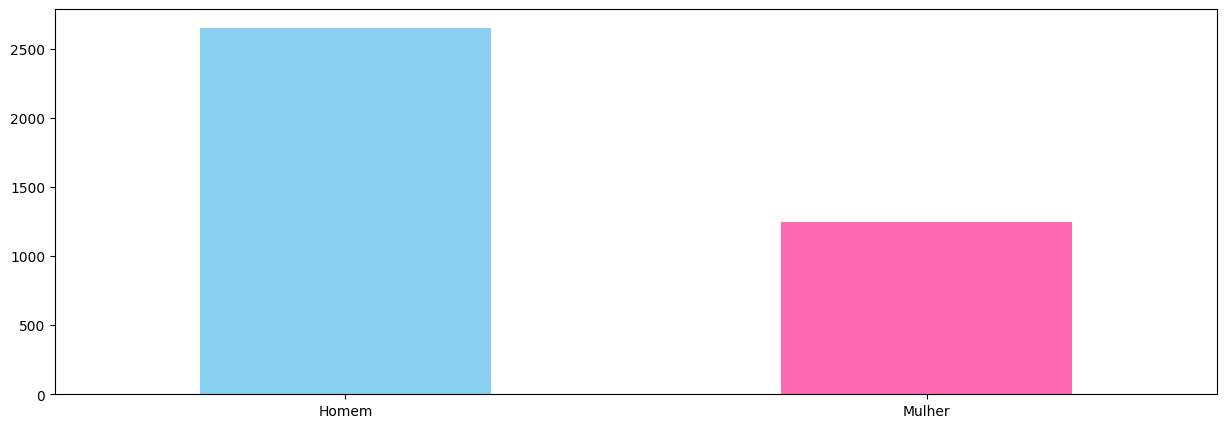

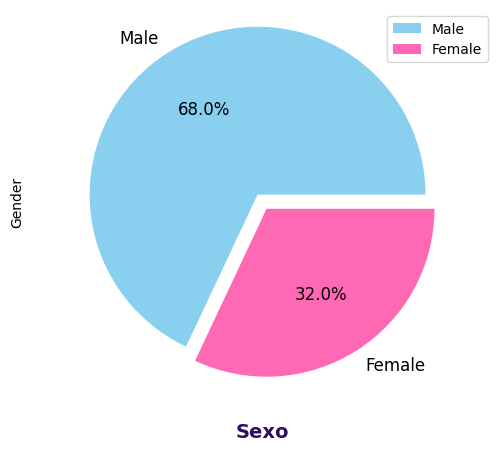

In [74]:
plt.figure(figsize = (15, 5))
ax = dataset["Gender"].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels(('Homem', 'Mulher'))

#for p in ax.patches:
    #ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    #ax.tick_params(axis = 'both', labelsize = 12)
#plt.xlabel('Sexo', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 16)
#plt.ylabel('Numero de ocorrências', weight = "bold", color = "#D71313", fontsize = 13, labelpad = 20);

plt.figure(figsize = (6, 5))
counts = dataset["Gender"].value_counts()
explode = (0, 0.1)

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Sexo', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

Verificaremos a seguir quais tipos de produto são mais (e menos) vendidos.

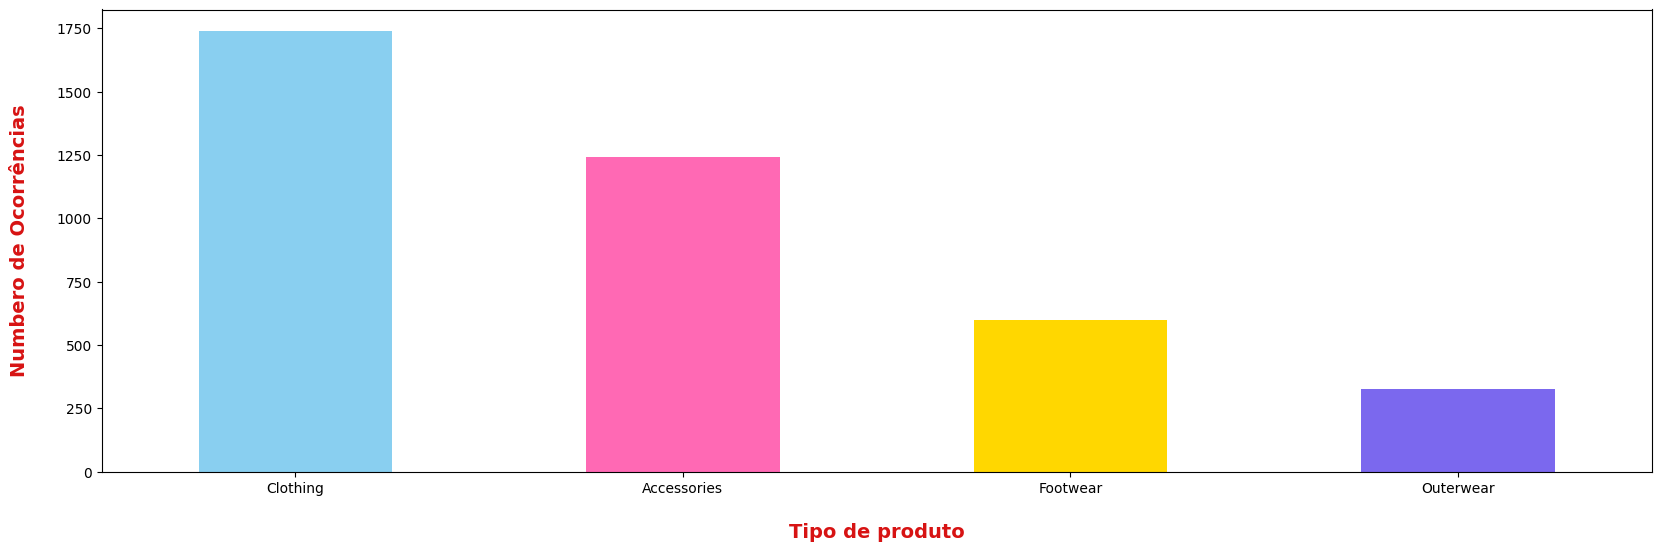

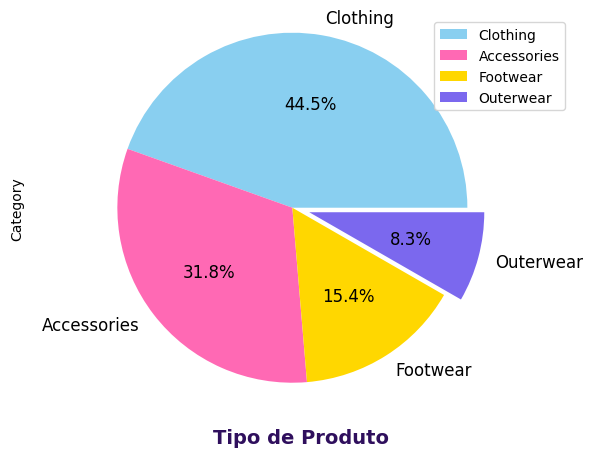

In [77]:
plt.figure(figsize = (20, 6))
x = dataset["Category"].value_counts().plot(kind = 'bar', color = colors, rot = 0)
#ax.set_xticklabels(('Clothing', 'Accessories', 'Footwear', 'Outerwear'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Tipo de produto', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('Numbero de Ocorrências', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);

plt.figure(figsize = (7, 5))
counts = dataset["Category"].value_counts()
explode = (0, 0.0, 0.0, 0.1)

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Tipo de Produto', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

Agora veremos qual a forma de pagamento mais comum usada por um cliente durante a venda do produto.

In [75]:
# Forma de pagamento mais comum
#
forma_pgto_mais_comum = dataset['Payment Method'].mode()[0]
print("A forma de pagamento mais comum é:", forma_pgto_mais_comum)

A forma de pagamento mais comum é: Credit Card


Veremos sua distribuição em um gráfico *pizza*.

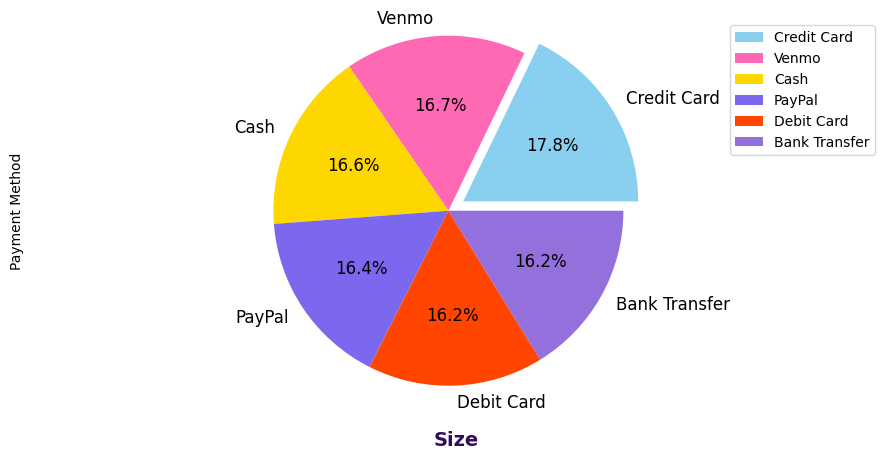

In [76]:
# Plota um gráfico de pizza com as formas de pagamento
#
plt.figure(figsize = (11, 5))
counts = dataset["Payment Method"].value_counts()
explode = (0.1, 0, 0, 0, 0.0, 0)

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Size', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

Testaremos se o dataset tem as classes numéricas balanceadas para que possamos tratar o desbalanceamento, caso se mostre necessário.

In [20]:
# Distribuição das classes (0 = desbalanceada, 1 = balanceada)
#
#dataset.groupby('Age').size()
#dataset.groupby('Purchase Amount (USD)').size()
#dataset.groupby('Review Rating').size()
#dataset.groupby('Previous Purchases').size()

Eles estão todos balanceados.

Faremos um gráfico *scatter plot* cruzando os atributos "Idade" vs "Vendas Anteriores" para ver se existe alguma relação entre eles.

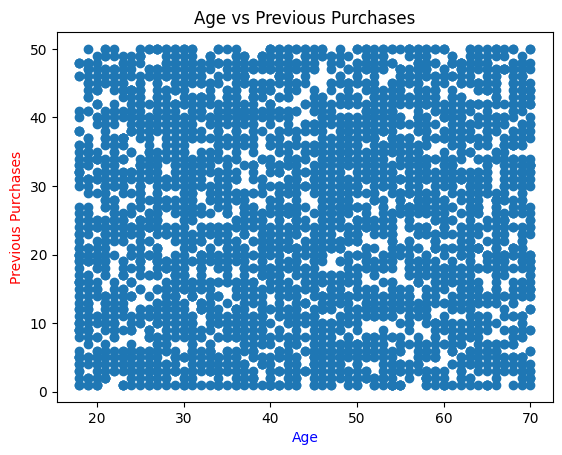

In [21]:
# Plotando gráfico de "Age vs Previous Purchases"
#
plt.scatter(dataset['Age'], dataset['Previous Purchases'])

#incluindo titulo do gráfico e rótulos dos eixos
#
plt.title('Age vs Previous Purchases')
plt.xlabel('Age', color='blue')
plt.ylabel('Previous Purchases', color='red')
plt.show()


Verificamos que não é possível determinar qualquer relação entre "Age" e "Previous Purchases".

Faremos um outro gráfico *scatter plot* cruzando os atributos "Review Rating " vs "Purchase Amount (USD)" para ver se existe alguma relação entre eles.

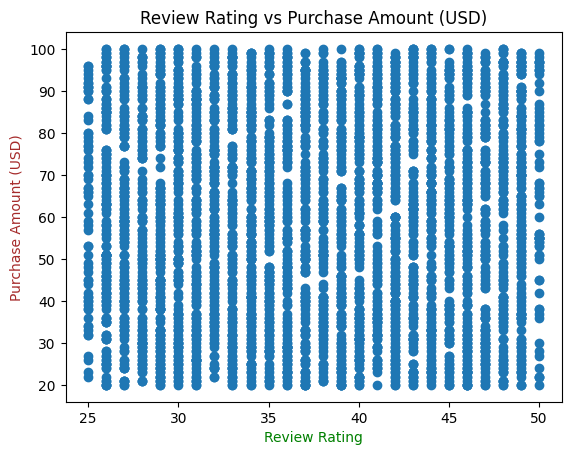

In [22]:
# Plotando gráfico de "Review Rating vs Purchase Amount (USD)"
#
plt.scatter(dataset['Review Rating'], dataset['Purchase Amount (USD)'])

#incluindo titulo do gráfico e rótulos dos eixos
#
plt.title('Review Rating vs Purchase Amount (USD)')
plt.xlabel('Review Rating', color='green')
plt.ylabel('Purchase Amount (USD)', color='brown')
plt.show()

Verificamos que não é possível determinar qualquer relação entre "Review Rating" e "Purchase Amount (USD)".

Escrever alguma coisa

In [24]:
test_size = 0.20
seed = 7

# Separação em conjuntos de treino e teste (dataset original)
array = dataset.values
X = array[:,0:8]
y = array[:,8]
#X_train, X_test, y_train, y_test = train_test_split(X, y,
#    test_size=test_size, shuffle=True, random_state=seed) # sem estratificação
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # com estratificação

In [25]:
# Separação em conjuntos de treino e teste (dataset sem missings - 2 colunas a menos!)
array = datasetSemMissings.values
X_sm = array[:,0:6]
y_sm = array[:,6]
#X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm,
#    test_size=test_size, shuffle=True, random_state=seed) # sem estratificação
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y_sm) # com estratificação

NameError: ignored

Vamos calcular o faturamento total por estado, procurando descobrir se existe algum estado que se destaque em relação ao faturamento.

In [41]:
# faturamento total por estado
#
faturamento_por_estado = dataset[[ 'Location','Purchase Amount (USD)' ]].groupby ('Location').sum()
display(faturamento_por_estado)

Purchase Amount (USD)
Location                             
Alabama                          5261
Alaska                           4867
Arizona                          4326
Arkansas                         4828
California                       5605
Colorado                         4222
Connecticut                      4226
Delaware                         4758
Florida                          3798
Georgia                          4645
Hawaii                           3752
Idaho                            5587
Illinois                         5617
Indiana                          4655
Iowa                             4201
Kansas                           3437
Kentucky                         4402
Louisiana                        4848
Maine                            4388
Maryland                         4795
Massachusetts                    4384
Michigan                         4533
Minnesota                        4977
Mississippi                      4883
Missouri                         4691
Montana                          5784
Nebraska                         5172
Nevada                           5514
New Hampshire                    4219
New Jersey                       3802
New Mexico                       5014
New York                         5257
North Carolina                   4742
North Dakota                     5220
Ohio                             4649
Oklahoma                         4376
Oregon                           4243
Pennsylvania                     4926
Rhode Island                     3871
South Carolina                   4439
South Dakota                     4236
Tennessee                        4772
Texas                            4712
Utah                             4443
Vermont                          4860
Virginia                         4842
Washington                       4623
West Virginia                    5174
Wisconsin                        4196
Wyoming                          4309

Agora vamos observar esse resultado em um gráfico *bar plot*, verificando graficamente quais estados se destacam pelo faturamento.

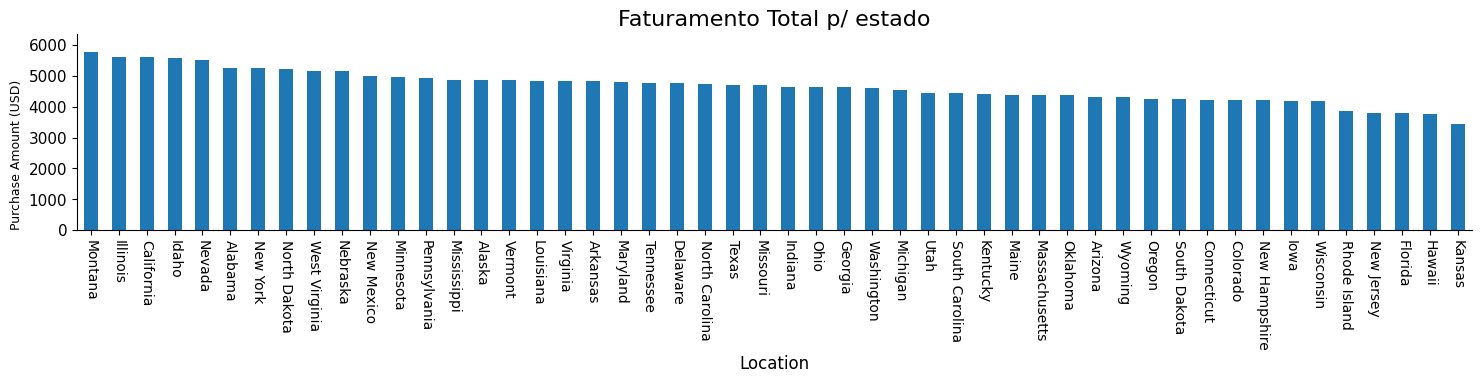

In [78]:
# plotando o gráfico de barras de "Faturamento Total p/ estado"
#
faturamento_por_estado_ordenado = faturamento_por_estado['Purchase Amount (USD)'].sort_values(ascending = False).plot(kind='bar', figsize=(18, 4), title='Purchase Amount (USD)', fontsize=11)
plt.gca().spines[['top', 'right']].set_visible(False)

# incluindo no gráfico de barras o título do gráfico e a legenda
#
plt.xticks(rotation=-90, fontsize=10)
plt.title('Faturamento Total p/ estado', fontsize=16, loc="center")
plt.xlabel('Location', fontsize=12, loc="center");
plt.ylabel('Purchase Amount (USD)', fontsize=9, loc="bottom")
plt.margins(0.1)
plt.subplots_adjust(bottom = 0.39)

# canto inferior esquerdo da figura como o ponto XY (0, 0)
#
#plt.xlim(left=0)
#plt.ylim(bottom=0)

plt.show()

Pelo gráfico podemos verificar que os 5 estados - por ordem decrescente - com maior faturamento são Montana, Illinois, California, Idaho, e Nevada.

In [43]:
#faturamento_por_estado['Purchase Amount (USD)'].sort_values(ascending = False).plot(kind='bar', figsize=(18, 4), title='Purchase Amount (USD)', fontsize=11)
#plt.gca().spines[['top', 'right']].set_visible(False)

#plt.show()
display(faturamento_por_estado_ordenado)

<Axes: title={'center': 'Faturamento Total p/ estado'}, xlabel='Location', ylabel='Purchase Amount (USD)'>

### 3.2. Visualizações Unimodais

Vamos criar agora um histograma para cada atributo numérico do dataset.

O histograma ilustra como uma determinada amostra de dados está distribuída, dispondo visualmente as informações de modo a facilitar a visualização da sua distribuição. Esse gráfico busca ressaltar a localização do valor central, e a forma da distribuição dos dados ao seu redor.

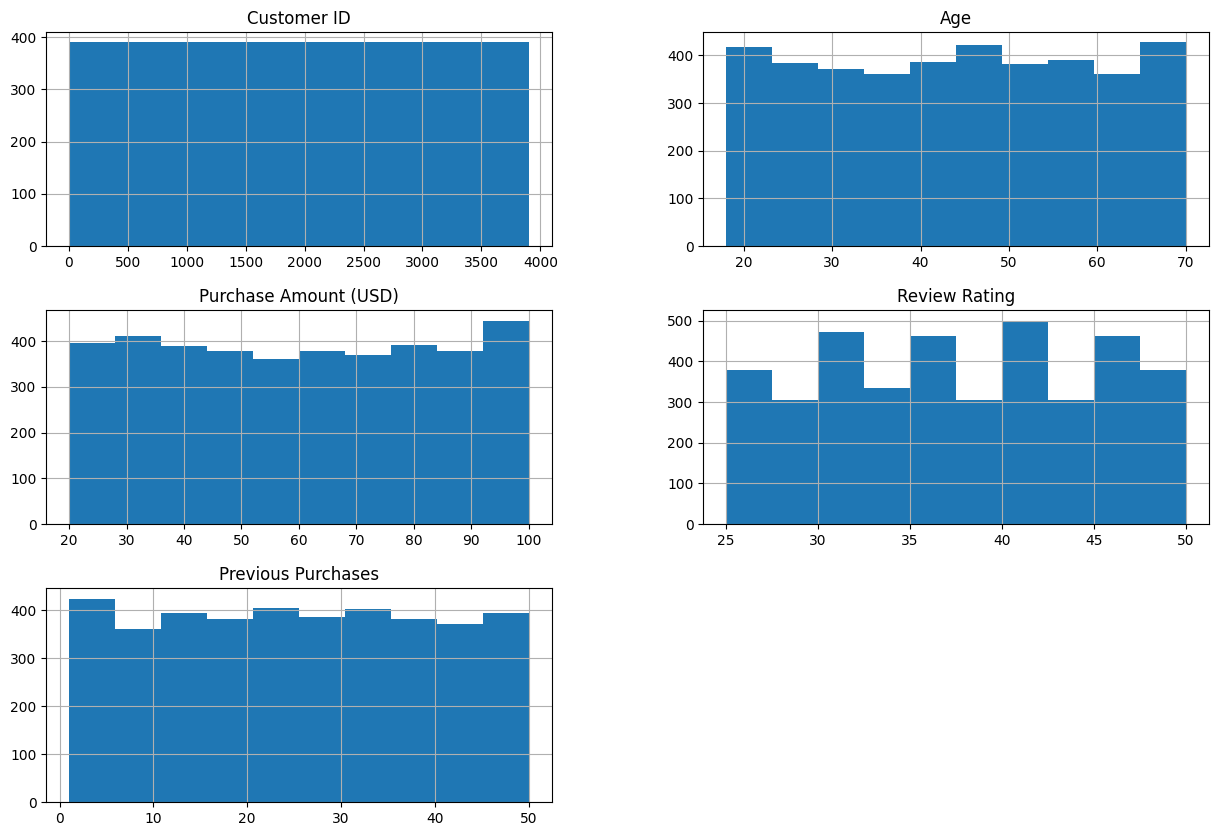

In [44]:
# Plotando o histograma
#
dataset.hist(figsize = (15,10))
plt.show()

Analisando os gráficos verificamos que todos os 5 atributos numéricos não possuem um valor central, já que suas distribuições são todas uniformes.

Faremos agora o Gráfico de Densidade (*ou Density Plot*), que é bem parecido com o histograma, mas com uma visualização um pouco diferente. Com ele pode ser mais fácil identificar a distribuição do atributos do dataset. Assim como fizemos com o histograma, vamos criar um density plot para cada atributo numérico do dataset.

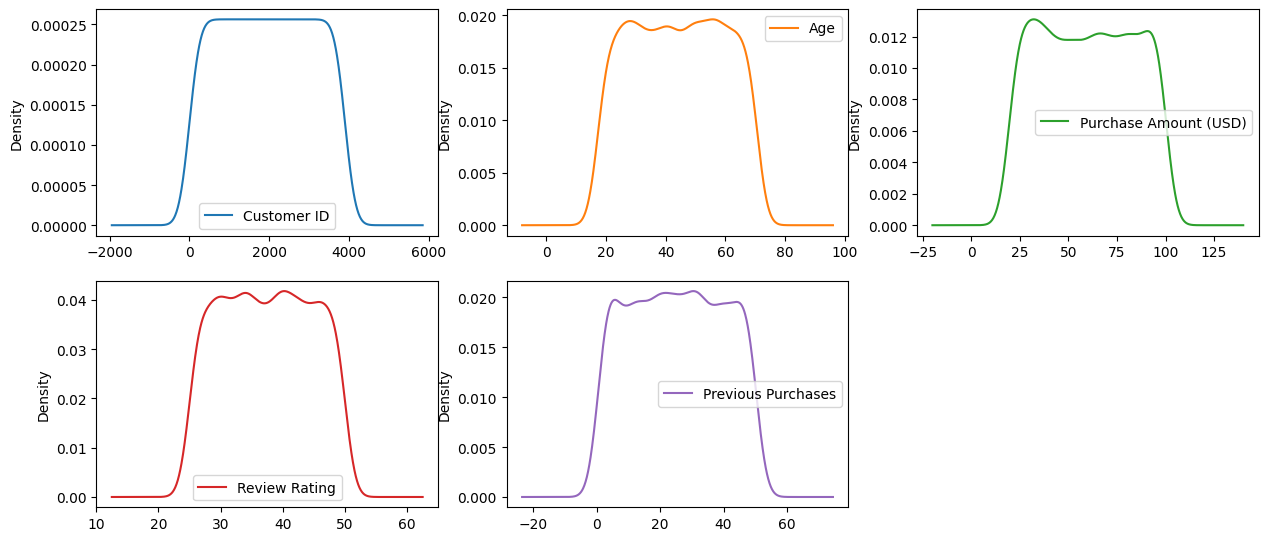

In [45]:
# Plotando o Density Plot
#
dataset.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False, figsize = (15,10))
plt.show()

Verificamos que todos os atributos possuem uma distribuição semelhante, ou seja, sem valor central.

Agora vamos trabalhar com *boxplots*. No gráfico *boxblot*, a linha no centro representa o valor da mediana (segundo quartil ou p50). A linha abaixo é o 1o quartil (p25) e a linha acima o terceiro quartil (p75). O boxplot ajuda a ter uma ideia da dispersão dos dataset e os possíveis outliers.

*OBS: Se um ponto do dataset é muito distante da média (acima de 3 desvios padrão da média), ele pode ser considerado outlier.*

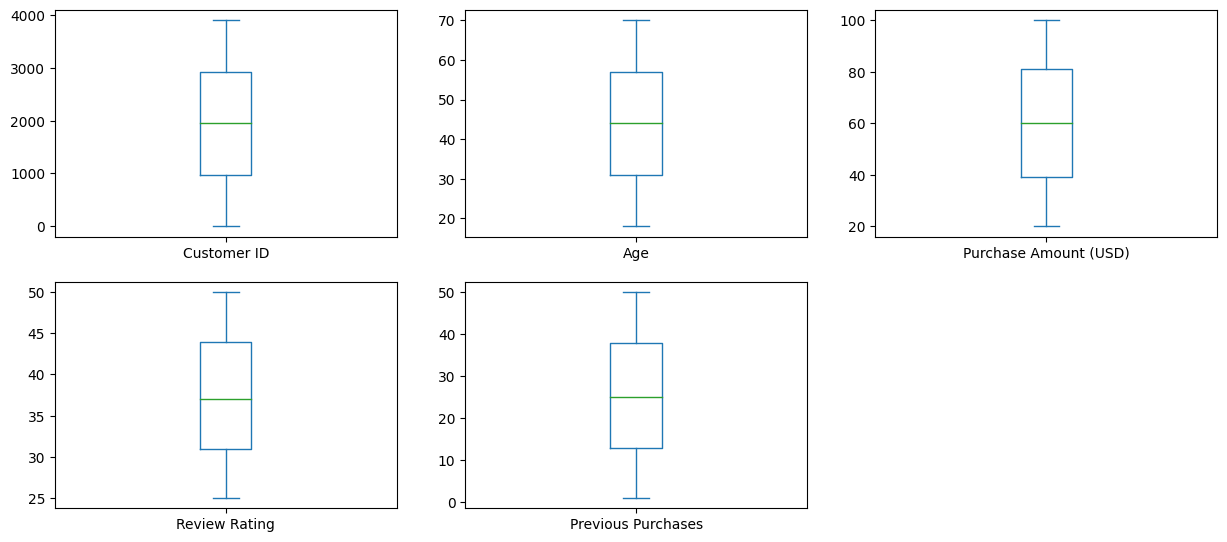

In [46]:
# Plotando o Boxplot
#
dataset.plot(kind = 'box', subplots = True, layout = (3,3), sharex = False, sharey = False, figsize = (15,10))
plt.show()

Podemos confirmar que os cinco atributos numéricos do dataset são uniformes e não possuem outliers.

### 3.3. Visualizações Multimodais

A matriz de correlação mostra os valores de correlação de Pearson, que medem o grau de relação linear entre cada par de variáveis. Os valores de correlação podem ter valores entre -1 e +1. Se as duas variáveis tendem a aumentar e diminuir juntas, o valor de correlação é positivo. Se uma variável aumenta enquanto a outra variável diminui, o valor de correlação é negativo. Quando está póximo de zero, não há correlação entre as variáveis.

Ao visualizar as correlações entre os atributos através da matriz de correlação, perceberemos que não parece haver estrutura na ordem dos atributos, já que a maioria dos atributos é zero ou muito próximo disso.

Se houvesse algum campo azul ao redor da diagonal, a matriz sugeriria que os atributos possuem alguma proximidade, mostrando os atributos com mais correlação entre si.

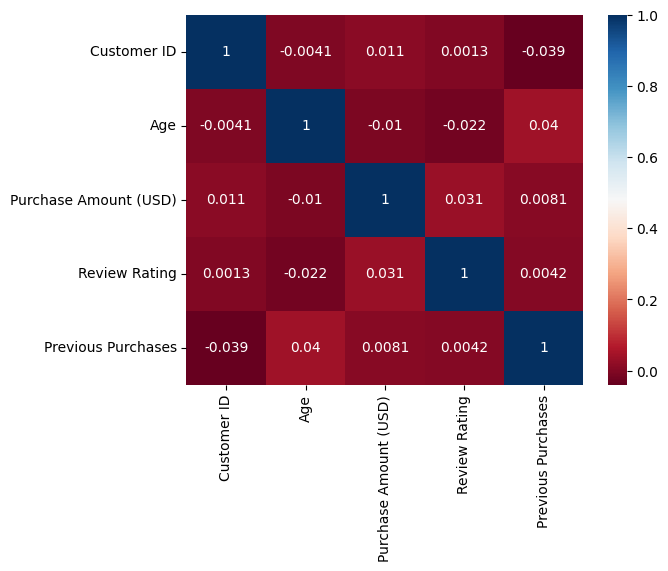

In [47]:
# Matriz de Correlação com Matplotlib Seaborn
#
sns.heatmap(dataset.corr(), annot=True, cmap='RdBu');

Por sua vez, o gráfico de dispersão (*scatter plot*) mostra o relacionamento entre duas variáveis. Vamos exibir um para cada par de atributos dos dataset, usando o *seaborn* variação 1 e 2.

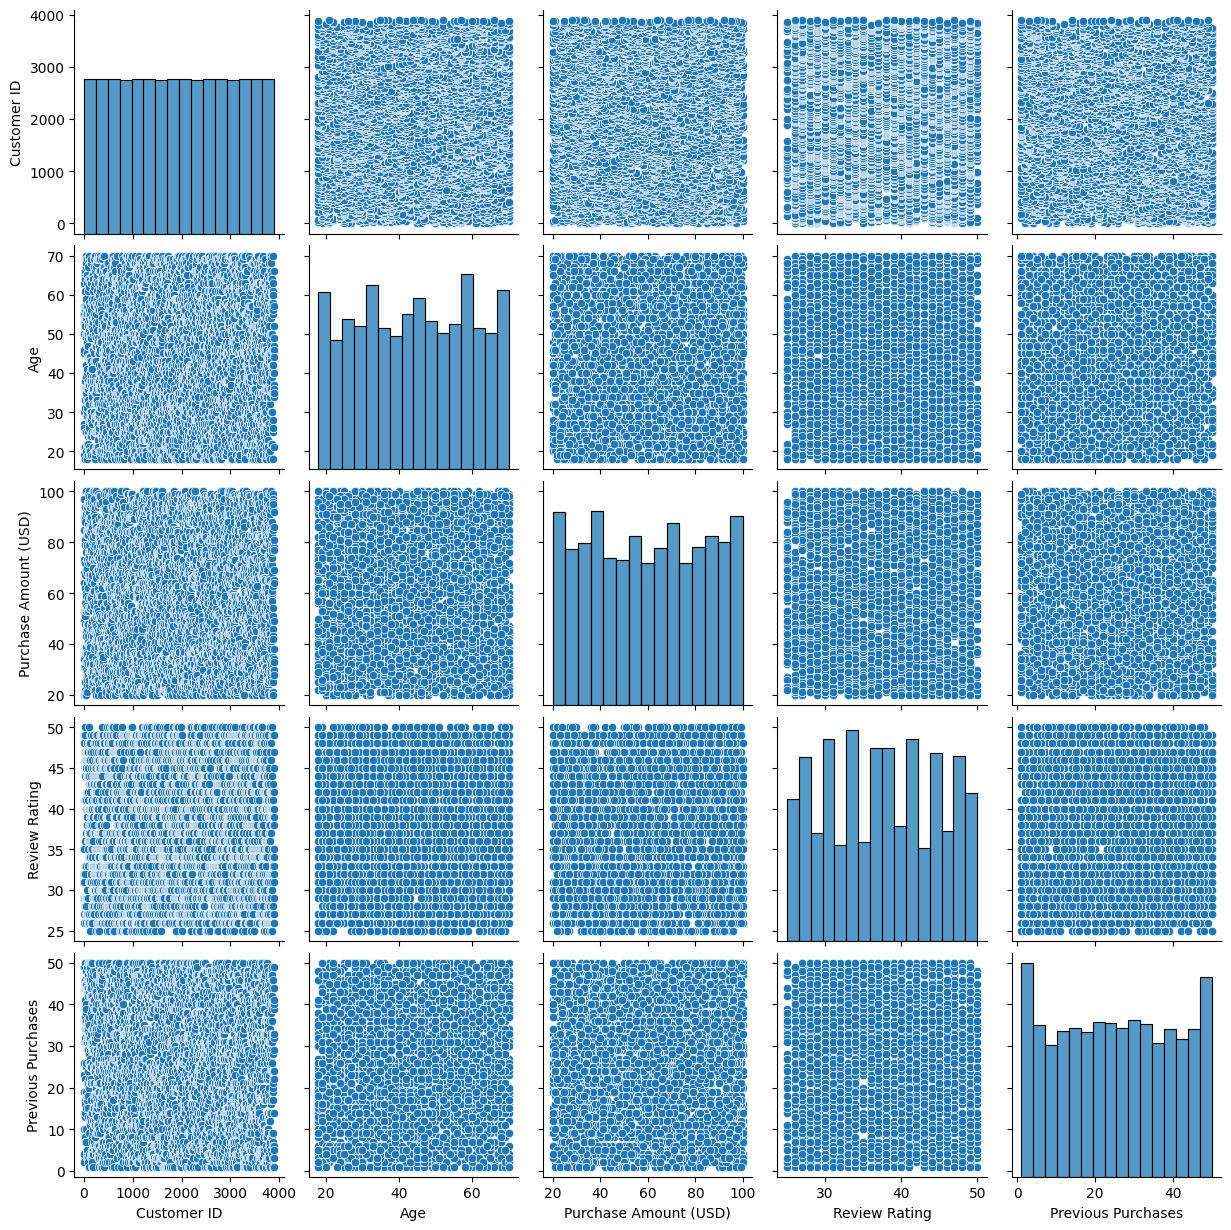

In [48]:
# Scatter Plot com Seaborn - Variação 1
#
sns.pairplot(dataset)

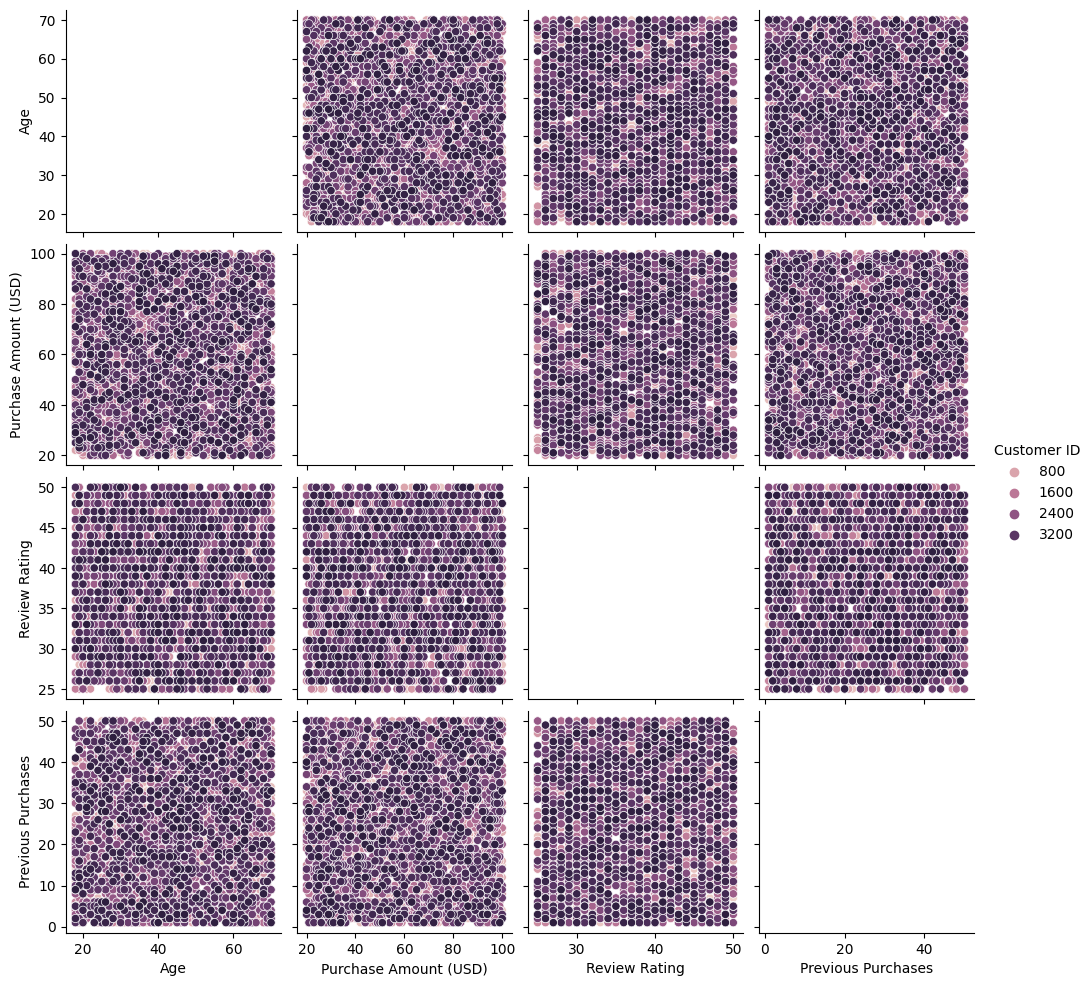

In [49]:
# Scatter Plot com Seaborn - Variação 2
#
sns.pairplot(dataset, hue = "Customer ID", height = 2.5);

Novamente observando os gráficos obtidos percebemos que não existe corelação entre as variáveis.

## 4. Pré-Processamento de dados

Nesta etapa, poderíamos realizar diversas operações de preparação de dados, como por exemplo, tratamento de valores missings (faltantes), limpeza de dados, transformações como one-hot-encoding, seleção de características (feature selection), entre outras não mostradas neste notebook. Lembre-se de não criar uma versão padronizada/normalizada dos dados neste momento (apesar de serem operações de pré-processamento) para evitar o Data Leakage.

### 4.1. Tratamento de Missings e Limpeza

Verificaremos se há algum valor *NULL* (nulo) no dataset.

In [50]:
# Verificando nulls no dataset
#
dataset.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

Não existe atributo com campo missing (com valor *NULL*) no dataset.

Retirando a última coluna do dataset.

<Axes: >

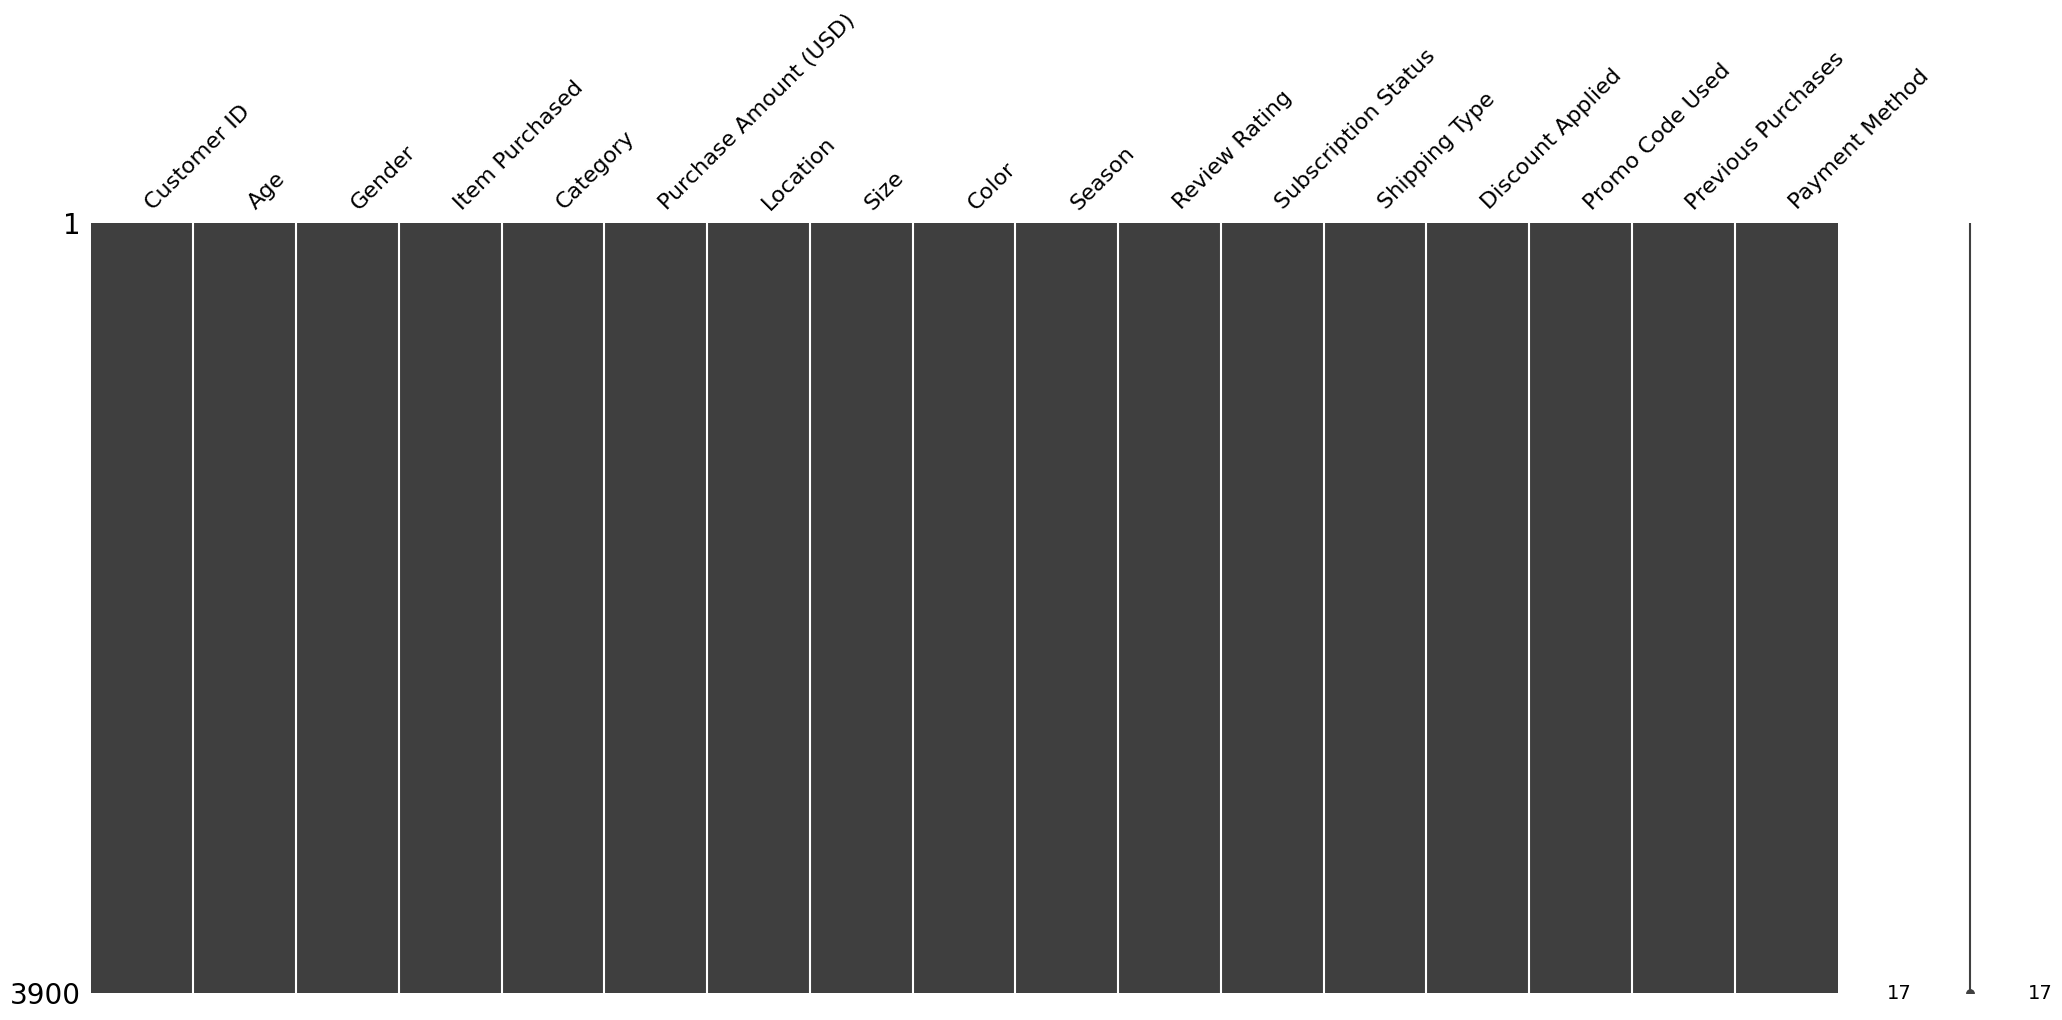

In [51]:
# salvando um NOVO dataset para tratamento de missings, com cuidado para não sobrescrever o dataset original

# recuperando os nomes das colunas
col = list(dataset.columns)

# o novo dataset irá conter todas as colunas com exceção da última (Frequency of Purchases)
atributos = dataset[col[0:-1]]

# substituindo os zeros por NaN
atributos.replace(0, np.nan, inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(atributos)

Removendo as colunas 'Subscription Status' e 'Promo Code Used'.

<Axes: >

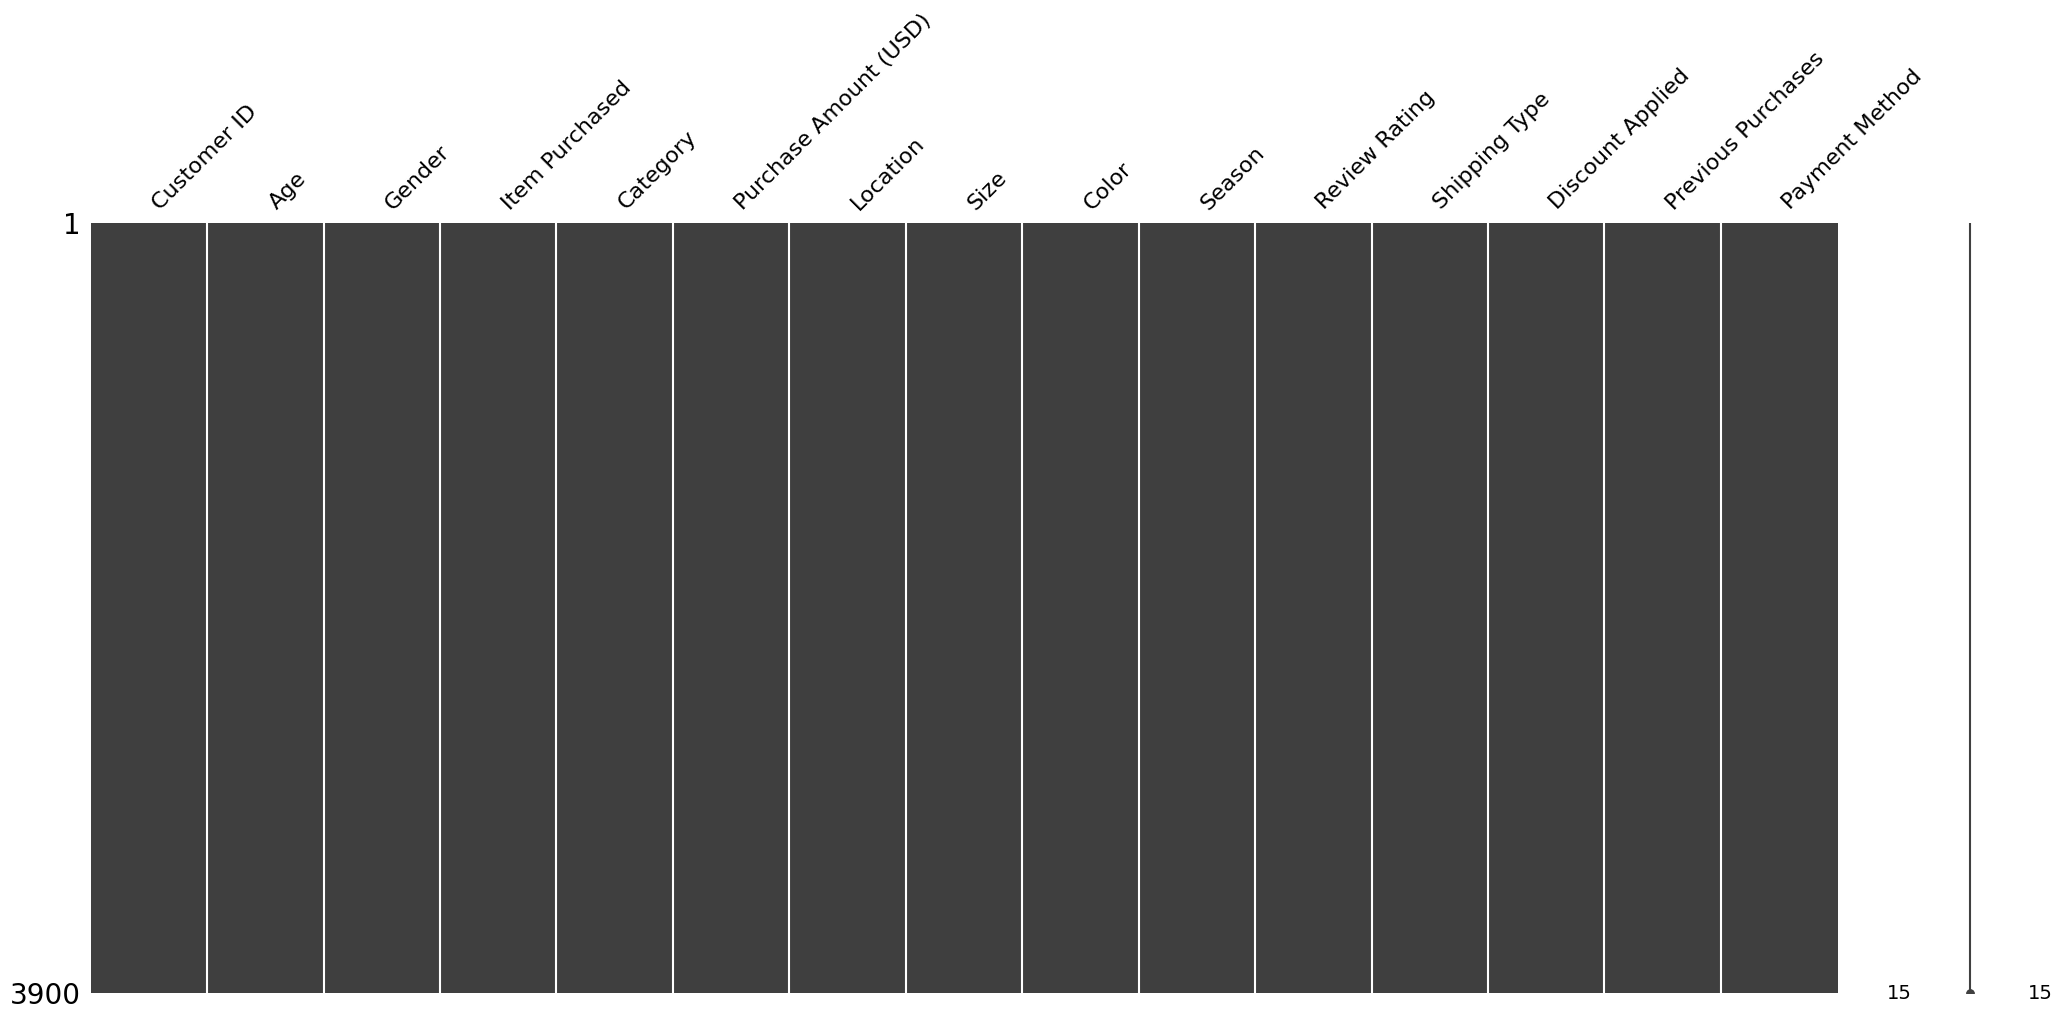

In [52]:
# removendo as colunas 'Subscription Status' e 'Promo Code Used'
#
atributos.drop(['Subscription Status', 'Promo Code Used'], axis=1, inplace= True)

# exibindo visualização matricial da nulidade do dataset
#
ms.matrix(atributos)

Zerando os campos não preenchidos do atributo "Age".

In [53]:
# substituindo os NaN de 'Age' por 0
#
atributos['Age'].fillna(0, inplace=True)

Substituindo os campos não preenchidos de 'Purchase Amount (USD)', 'Review Rating'e 'Previous Purchases' pela mediana dos restantes valores da coluna.

<Axes: >

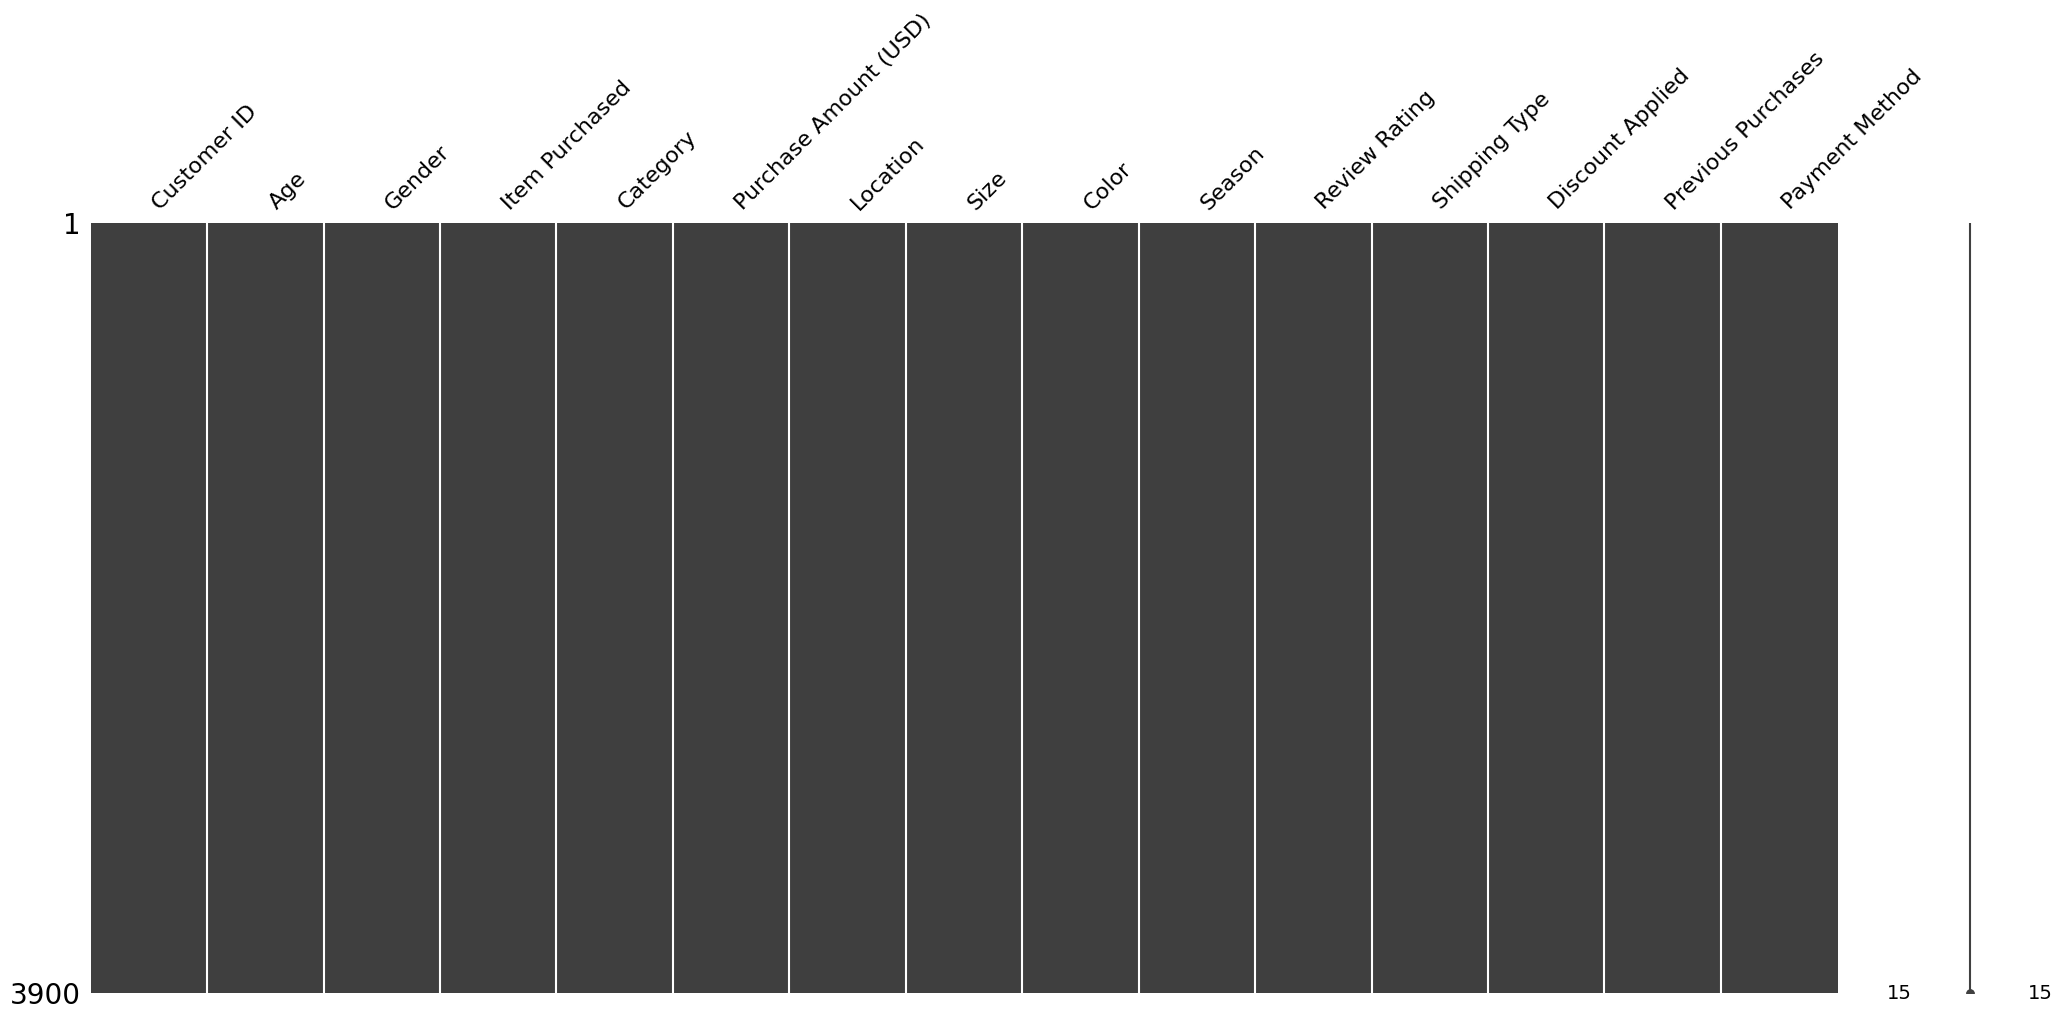

In [54]:
# substituindo os NaN de 'Purchase Amount (USD)', 'Review Rating' e 'Previous Purchases' pela mediana da coluna
#
atributos['Purchase Amount (USD)'].fillna(atributos['Purchase Amount (USD)'].median(), inplace=True)
atributos['Review Rating'].fillna(atributos['Review Rating'].median(), inplace=True)
atributos['Previous Purchases'].fillna(atributos['Previous Purchases'].median(), inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(atributos)

Salvando o dataset antigo e mostrando as primeiras 10 linhas do dataset após a limpeza.

In [55]:
# Guardando o novo dataset para testes futuros
#
datasetSemMissings = atributos

# incluindo a coluna 'Frequency of Purchases' no novo dataset
#
datasetSemMissings['Frequency of Purchases'] = dataset['Frequency of Purchases']

# exibindo as primeiras linhas
#
datasetSemMissings.head(10)

Customer ID  Age Gender Item Purchased     Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse     Clothing                     53   
1            2   19   Male        Sweater     Clothing                     64   
2            3   50   Male          Jeans     Clothing                     73   
3            4   21   Male        Sandals     Footwear                     90   
4            5   45   Male         Blouse     Clothing                     49   
5            6   46   Male       Sneakers     Footwear                     20   
6            7   63   Male          Shirt     Clothing                     85   
7            8   27   Male         Shorts     Clothing                     34   
8            9   26   Male           Coat    Outerwear                     97   
9           10   57   Male        Handbag  Accessories                     31   

        Location Size      Color  Season  Review Rating   Shipping Type  \
0       Kentucky    L       Gray  Winter             31         Express   
1          Maine    L     Maroon  Winter             31         Express   
2  Massachusetts    S     Maroon  Spring             31   Free Shipping   
3   Rhode Island    M     Maroon  Spring             35    Next Day Air   
4         Oregon    M  Turquoise  Spring             27   Free Shipping   
5        Wyoming    M      White  Summer             29        Standard   
6        Montana    M       Gray    Fall             32   Free Shipping   
7      Louisiana    L   Charcoal  Winter             32   Free Shipping   
8  West Virginia    L     Silver  Summer             26         Express   
9       Missouri    M       Pink  Spring             48  2-Day Shipping   

  Discount Applied  Previous Purchases Payment Method Frequency of Purchases  
0              Yes                  14    Credit Card            Fortnightly  
1              Yes                   2  Bank Transfer            Fortnightly  
2              Yes                  23           Cash                 Weekly  
3              Yes                  49         PayPal                 Weekly  
4              Yes                  31           Cash               Annually  
5              Yes                  14          Venmo                 Weekly  
6              Yes                  49     Debit Card              Quarterly  
7              Yes                  19     Debit Card                 Weekly  
8              Yes                   8          Venmo               Annually  
9              Yes                   4         PayPal              Quarterly

### 4.2. Separação em conjunto de treino e conjunto de teste

É uma boa prática usar um conjunto de teste (na literatura também chamado de conjunto de validação), uma amostra dos dados que não será usada para a construção do modelo, mas somente no fim do projeto para confirmar a precisão do modelo final. É um teste que podemos usar para verificar o quão boa foi a construção do modelo, e para nos dar uma ideia de como o modelo irá performar nas estimativas em dados não vistos. Usaremos 80% do conjunto de dados para modelagem e guardaremos 20% para teste, usando a estratégia train-test-split, já explicada anteriormente. Primeiramente, iremos sinalizar quais são as colunas de atributos (X - 0 a 7) e qual é a coluna das classes (Y - 8). Em seguida, especificaremos o tamanho do conjunto de teste desejado e uma semente (para garantir a reprodutibilidade dos resultados). Finalmente, faremos a separação dos conjuntos de treino e teste através do comando train_test_split, que retornará 4 estruturas de dados: os atributos e classes para o conjunto de teste e os atributos e classes para o conjunto de treino.


## Conclusão

Neste MVP foi possível verificar que... [escreva aqui os seu principais achados, pontos de atenção, etc.]